Write a program for fitting a line for given data with Machine learning

NAME ATHARVA BALPANDE
ROLL NO 313002
DIV:C1
PRN:22111143

In [226]:
#Importing all the required datasheet
from pandas import read_csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'

Dataframe= read_csv(url,header=None)
print(Dataframe)
data=Dataframe.values

xs,ys =data[:,4], data[:,1]
print()
print('xs=',xs)
print('ys=',ys)

        0        1      2      3        4     5       6
0    83.0  234.289  235.6  159.0  107.608  1947  60.323
1    88.5  259.426  232.5  145.6  108.632  1948  61.122
2    88.2  258.054  368.2  161.6  109.773  1949  60.171
3    89.5  284.599  335.1  165.0  110.929  1950  61.187
4    96.2  328.975  209.9  309.9  112.075  1951  63.221
5    98.1  346.999  193.2  359.4  113.270  1952  63.639
6    99.0  365.385  187.0  354.7  115.094  1953  64.989
7   100.0  363.112  357.8  335.0  116.219  1954  63.761
8   101.2  397.469  290.4  304.8  117.388  1955  66.019
9   104.6  419.180  282.2  285.7  118.734  1956  67.857
10  108.4  442.769  293.6  279.8  120.445  1957  68.169
11  110.8  444.546  468.1  263.7  121.950  1958  66.513
12  112.6  482.704  381.3  255.2  123.366  1959  68.655
13  114.2  502.601  393.1  251.4  125.368  1960  69.564
14  115.7  518.173  480.6  257.2  127.852  1961  69.331
15  116.9  554.894  400.7  282.7  130.081  1962  70.551

xs= [107.608 108.632 109.773 110.929 112.075 11

In [227]:
#print(tf.__version__)
import tensorflow as tf
from tensorflow import keras

In [228]:
#print(keras.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [229]:
#training and cleaning the data
#splitting the data into training set and testing set
X_train=xs[0:70]
X_test=xs[71::]
Y_train=ys[0:70]
Y_test=ys[71::]
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[107.608 108.632 109.773 110.929 112.075 113.27  115.094 116.219 117.388
 118.734 120.445 121.95  123.366 125.368 127.852 130.081]
[]
[234.289 259.426 258.054 284.599 328.975 346.999 365.385 363.112 397.469
 419.18  442.769 444.546 482.704 502.601 518.173 554.894]
[]


In [230]:
#using the train_test_split function from Scikit-Learn to split your data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(xs,ys,test_size=0.3,random_state=0)
print(X_test)
print(Y_test)

[108.632 115.094 117.388 118.734 125.368]
[259.426 365.385 397.469 419.18  502.601]


In [231]:
#defining a simple neural network model using TensorFlow's Keras API
model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_dim=1),
tf.keras.layers.Dense(10,activation=tf.nn.relu),
tf.keras.layers.Dense(1)])

In [232]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 1)                 2         
                                                                 
 dense_58 (Dense)            (None, 10)                20        
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [233]:
#configure the training process
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
loss=tf.keras.losses.mean_squared_error,
metrics=[tf.keras.metrics.MeanSquaredError()])

In [234]:
model.fit(X_train,Y_train,epochs=10,verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 503ms/step - loss: 122052.4531 - mean_squared_error: 122052.4531
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 68453.9453 - mean_squared_error: 68453.9453
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 29329.1582 - mean_squared_error: 29329.1582
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 7717.3623 - mean_squared_error: 7717.3623
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 13238.1182 - mean_squared_error: 13238.1182
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 30855.5605 - mean_squared_error: 30855.5605
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 31260.1484 - mean_squared_error: 31260.1484
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 20416.6895 - mean_squared_error: 20416.6895
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 10531.3574 - mea

In [235]:
model.evaluate(X_test,Y_test,verbose=2)


1/1 - 0s - loss: 5157.6016 - mean_squared_error: 5157.6016 - 92ms/epoch - 92ms/step


[5157.6015625, 5157.6015625]

1/1 [==============================] - 0s 52ms/step


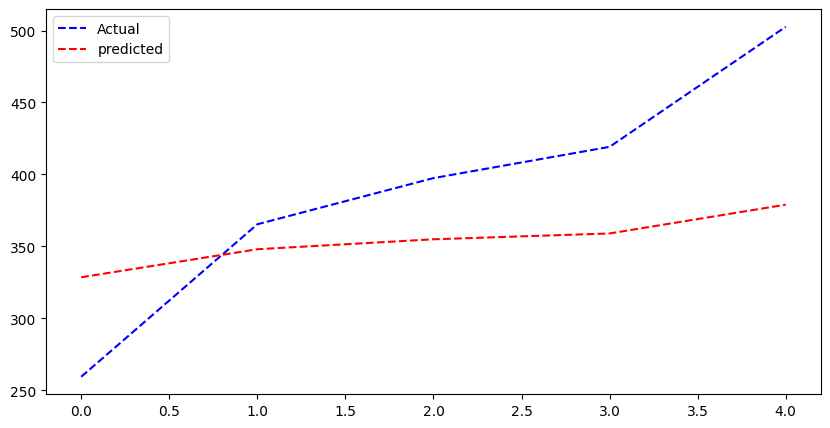

In [236]:
X_new = X_test[:20]
Y_pred = model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(X_new),1),Y_test[:20],'b--',label='Actual')
plt.plot(np.arange(0,len(X_new),1),Y_pred,'r--',label = 'predicted')
plt.legend()
plt.show()